In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import math

path = '/Users/artemilin/Downloads/data'

In [3]:
companies_of_choice = ['AAPL.csv',  ## Apple
                       'AMZN.csv',  ## Amazon
                       'FB.csv',  ## Facebook (now META)
                       'GOOGL.csv',  ## Google Alphabet Inc.
                       'MSFT.csv',  ## Microsoft
                       'NFLX.csv',  ## Netflix
                       'NVDA.csv',  ## Nvidia
                       'TSLA.csv'  ## Tesla
                       ]

In [4]:
all_dfs = []
shapes_of_tickers_dfs = {}

for ticker in companies_of_choice:
    dirs = []
    for year in ['2017', '2018', '2019', '2021']:
        dirs.append(f'{path}/{year}/{ticker}')

    df_ticker = pd.concat(
        map(pd.read_csv, dirs), ignore_index=True)
    #df_ticker['date'] = pd.to_datetime(df_ticker['date'])
    shapes_of_tickers_dfs[ticker] = df_ticker.shape

    all_dfs.append(df_ticker.add_prefix(f'{ticker.split(".")[0]}_'))

df = pd.concat(all_dfs, axis=1)

In [100]:
df

,AAPL_date,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,AAPL_vwap,AAPL_timestamp,AAPL_transactions,AAPL_otc,...,TSLA_date,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume,TSLA_vwap,TSLA_timestamp,TSLA_transactions,TSLA_otc
0,2017-01-03 09:30:00-05:00,28.9500,28.9750,28.8750,28.9713,3851984.0,28.9422,1483453800000,1970.0,NaN,...,2017-01-03 09:30:00-05:00,14.3240,14.3533,14.2800,14.2840,1360425.0,14.3219,1.483454e+12,367.0,NaN
1,2017-01-03 09:31:00-05:00,28.9750,29.0625,28.9475,29.0622,997416.0,29.0088,1483453860000,1050.0,NaN,...,2017-01-03 09:31:00-05:00,14.2800,14.2987,14.2500,14.2500,756270.0,14.2741,1.483454e+12,497.0,NaN
2,2017-01-03 09:32:00-05:00,29.0625,29.0825,29.0575,29.0750,653408.0,29.0686,1483453920000,700.0,NaN,...,2017-01-03 09:32:00-05:00,14.2500,14.2500,14.1720,14.1893,702690.0,14.2128,1.483454e+12,550.0,NaN
3,2017-01-03 09:33:00-05:00,29.0750,29.0750,29.0050,29.0276,1005592.0,29.0285,1483453980000,1049.0,NaN,...,2017-01-03 09:33:00-05:00,14.1853,14.2020,14.0913,14.1000,1084935.0,14.1462,1.483454e+12,599.0,NaN
4,2017-01-03 09:34:00-05:00,29.0273,29.0600,29.0273,29.0375,667760.0,29.0412,1483454040000,929.0,NaN,...,2017-01-03 09:34:00-05:00,14.0933,14.1253,14.0640,14.1193,1251645.0,14.0868,1.483454e+12,689.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404432,2020-12-31 15:56:00-05:00,132.6500,132.8200,132.6500,132.7693,513816.0,132.7459,1609448160000,3191.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404433,2020-12-31 15:57:00-05:00,132.7700,132.9200,132.7600,132.8408,505929.0,132.8310,1609448220000,3527.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404434,2020-12-31 15:58:00-05:00,132.8400,132.9200,132.8300,132.8600,517398.0,132.8745,1609448280000,3472.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404435,2020-12-31 15:59:00-05:00,132.8650,133.0000,132.5500,132.5800,1698250.0,132.8086,1609448340000,8187.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df_AAPL = df[['AAPL_date', 'AAPL_open', 'AAPL_high', 'AAPL_low', 'AAPL_close', 'AAPL_volume', 'AAPL_vwap',
              'AAPL_transactions']]  # 'AAPL_timestamp',
df_AAPL[['AAPL_date']] = df_AAPL[['AAPL_date']]

/var/folders/xd/xm863f553v750zss70sl77sc0000gn/T/ipykernel_3033/3678151825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAPL[['AAPL_date']] = df_AAPL[['AAPL_date']]


In [102]:
df_AAPL = df_AAPL.dropna()
df_AAPL["AAPL_OBV"] = (np.sign(df_AAPL["AAPL_close"].diff()) * df_AAPL["AAPL_volume"]).fillna(0).cumsum()

In [103]:
df_AAPL["AAPL_r"] = df_AAPL["AAPL_close"].pct_change()
df_AAPL = df_AAPL.iloc[1:]

In [105]:
returns = df_AAPL["AAPL_close"]
vols = returns.rolling(60).std(ddof=0)

In [106]:
df_AAPL['AAPL_vol'] = pd.DataFrame(vols)

In [107]:
df_AAPL['AAPL_vol'].fillna((df_AAPL['AAPL_vol'].mean()), inplace=True)

In [115]:
exp1 = df_AAPL['AAPL_close'].ewm(span=12, adjust=False).mean()
exp2 = df_AAPL['AAPL_close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
df_AAPL['AAPL_MACD'] = macd

In [ ]:
def VaR_historic(r, level=5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(VaR_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


VaRs = df_AAPL['AAPL_r'].rolling(60)

df_AAPL['AAPL_VaR'] = pd.DataFrame(VaRs)
df_AAPL['AAPL_VaR'].fillna((df_AAPL['AAPL_VaR'].mean()), inplace=True)

In [116]:
df_AAPL

,AAPL_date,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,AAPL_vwap,AAPL_transactions,AAPL_OBV,AAPL_r,AAPL_vol,AAPL_MACD
1,2017-01-03 09:31:00-05:00,28.9750,29.0625,28.9475,29.0622,997416.0,29.0088,1050.0,9.974160e+05,0.003138,0.121026,0.000000
2,2017-01-03 09:32:00-05:00,29.0625,29.0825,29.0575,29.0750,653408.0,29.0686,700.0,1.650824e+06,0.000440,0.121026,0.001021
3,2017-01-03 09:33:00-05:00,29.0750,29.0750,29.0050,29.0276,1005592.0,29.0285,1049.0,6.452320e+05,-0.001630,0.121026,-0.001972
4,2017-01-03 09:34:00-05:00,29.0273,29.0600,29.0273,29.0375,667760.0,29.0412,929.0,1.312992e+06,0.000341,0.121026,-0.003504
5,2017-01-03 09:35:00-05:00,29.0375,29.0625,29.0200,29.0375,779004.0,29.0435,1434.0,1.312992e+06,0.000000,0.121026,-0.004665
...,...,...,...,...,...,...,...,...,...,...,...,...
404432,2020-12-31 15:56:00-05:00,132.6500,132.8200,132.6500,132.7693,513816.0,132.7459,3191.0,2.449499e+09,0.000975,0.165031,0.009497
404433,2020-12-31 15:57:00-05:00,132.7700,132.9200,132.7600,132.8408,505929.0,132.8310,3527.0,2.450005e+09,0.000539,0.164771,0.010779
404434,2020-12-31 15:58:00-05:00,132.8400,132.9200,132.8300,132.8600,517398.0,132.8745,3472.0,2.450522e+09,0.000145,0.164407,0.013192
404435,2020-12-31 15:59:00-05:00,132.8650,133.0000,132.5500,132.5800,1698250.0,132.8086,8187.0,2.448824e+09,-0.002107,0.167120,-0.007404


Text(0, 0.5, 'Prices ($)')

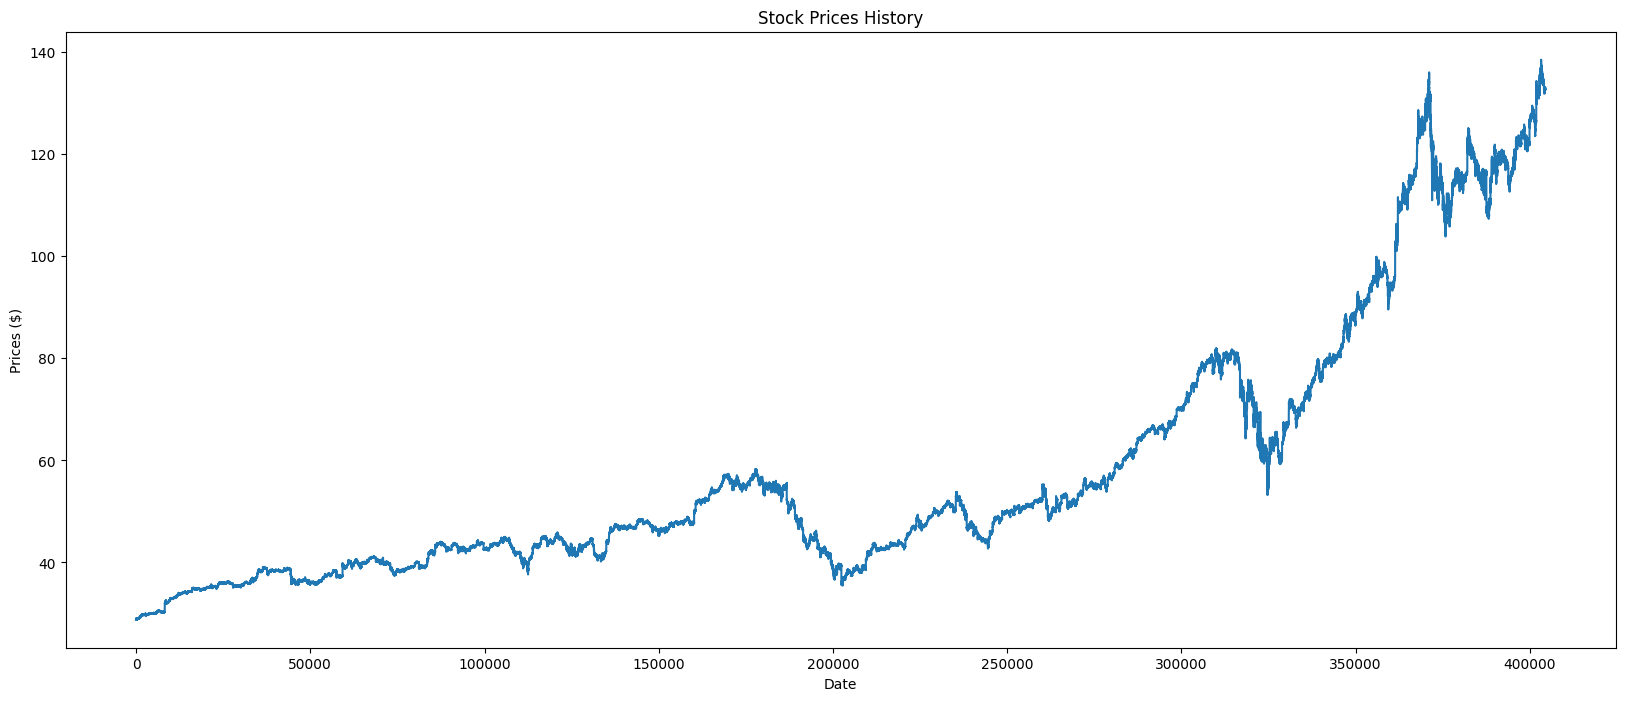

In [123]:
plt.figure(figsize=(20, 8))
plt.title('Stock Prices History')
plt.plot(df_AAPL[['AAPL_close']])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [126]:
df_AAPL.columns

Index(['AAPL_date', 'AAPL_open', 'AAPL_high', 'AAPL_low', 'AAPL_close',
       'AAPL_volume', 'AAPL_vwap', 'AAPL_transactions', 'AAPL_OBV', 'AAPL_r',
       'AAPL_vol', 'AAPL_MACD'],
      dtype='object')

In [128]:
close_prices = df_AAPL['AAPL_close']
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.8)

scaled_data = MinMaxScaler(feature_range=(0, 1)).fit_transform(values.reshape(-1, 1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [129]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [130]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')  ### 
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
323488/323488 [==============================] - 2912s 9ms/step - loss: 11.2994
Epoch 2/3
323488/323488 [==============================] - 9973s 31ms/step - loss: 9.4546
Epoch 3/3
323488/323488 [==============================] - 4132s 13ms/step - loss: 8.4213


Here is my Pycharm IDE decided to forget what "model" and other variables are. So, I would have to re-run whole notebook again... Pls mind that LSTM learning takes approximately 3 hour of life, anyway we already got only 11.2994, 9.4546, 8.4213 losses, which is pretty decent if you ask me.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]



predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

In [ ]:
data = df_AAPL.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()